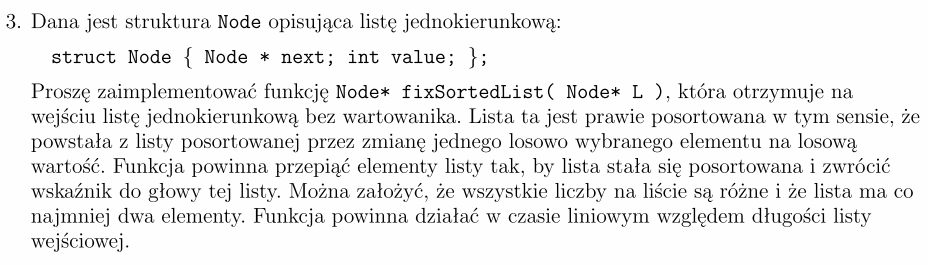

# I Sposób
### (Bez dokładania wartownika)

In [1]:
class Node:
    def __init__(self, val=None):
        self.val = val
        self.next = None
        

def fixSortedList(L):
    # Do nothing if a list contains no more than 1 element
    if not L or not L.next: return L
    # If the first node is wrongly placed
    if L.val > L.next.val:
        removed = L
        L = L.next
        # Look for a right position for a node removed
        prev = L
        while prev.next and prev.next.val < removed.val:
            prev = prev.next
        # Link a node removed after a prev node
        removed.next = prev.next
        prev.next = removed
    # Else, look for a node which is wrongly placed, somewhere inside
    else:
        prev = L
        while prev.next.next and prev.next.val <= prev.next.next.val:
            prev = prev.next
        # Remove a node with a wrong value
        removed = prev.next
        prev.next = prev.next.next
        # Look for a position to insert this node
        if removed.val < L.val:
            removed.next = L
            L.next = removed
        prev = L
        while prev.next and prev.next.val < removed.val:
            prev = prev.next
        # Link a node removed after a prev node
        removed.next = prev.next
        prev.next = removed
    return L

##### Funkcje pomocnicze

In [2]:
def create_linked_list(values: 'iterable' = None) -> 'linked list first (head)':
    head = Node()  # A sentinel node
    if not values: return None
    head.next = curr = Node(values[0])
    for i in range(1, len(values)):
        curr.next = Node(values[i])
        curr = curr.next
    return head.next


def print_linked_list(ll_head: 'linked list first (head)'):
    curr = ll_head
    print(curr.val, end=' ')
    curr = curr.next
    while curr:
        print('->', curr.val, end=' ')
        curr = curr.next
    print()
    
        
def linked_list_to_list(ll_head: 'linked list first (head)') -> list:
    values = []
    curr = ll_head
    while curr:
        values.append(curr.val)
        curr = curr.next
    return values

Kilka testów

In [3]:
import random

def test(mul, counts):
    arr = sorted(round(random.random() * mul, 2) for _ in range(random.randint(*counts)))
    # Replace one value with a wrong one
    idx = random.randrange(len(arr))
    if idx + 1 < len(arr):
        arr[idx] = round(random.random() * 100 + arr[idx + 1], 2)
    else:
        arr[idx] = round(random.random() * 100 - arr[idx - 1], 2)

    sorted_arr = sorted(arr)
    ll = create_linked_list(arr)
    print('Replaced value: idx =', idx, '  val =', arr[idx])
    print('Array before:')
    print(arr)
    print('Linked list before:')
    print_linked_list(ll)
    print()
    ll = fixSortedList(ll)
    print('After fixing:')
    print_linked_list(ll)
    print('Is correct?:', sorted_arr == linked_list_to_list(ll))

In [4]:
test(100, (2, 25))

Replaced value: idx = 19   val = 151.66
Array before:
[3.77, 12.08, 12.85, 15.66, 20.0, 25.85, 34.01, 35.28, 35.88, 37.23, 43.72, 44.43, 47.57, 50.35, 53.29, 55.5, 57.67, 62.97, 66.27, 151.66, 90.32, 90.62, 93.26, 95.57]
Linked list before:
3.77 -> 12.08 -> 12.85 -> 15.66 -> 20.0 -> 25.85 -> 34.01 -> 35.28 -> 35.88 -> 37.23 -> 43.72 -> 44.43 -> 47.57 -> 50.35 -> 53.29 -> 55.5 -> 57.67 -> 62.97 -> 66.27 -> 151.66 -> 90.32 -> 90.62 -> 93.26 -> 95.57 

After fixing:
3.77 -> 12.08 -> 12.85 -> 15.66 -> 20.0 -> 25.85 -> 34.01 -> 35.28 -> 35.88 -> 37.23 -> 43.72 -> 44.43 -> 47.57 -> 50.35 -> 53.29 -> 55.5 -> 57.67 -> 62.97 -> 66.27 -> 90.32 -> 90.62 -> 93.26 -> 95.57 -> 151.66 
Is correct?: True


# II Sposób
### (Z dorobieniem wartownika)

In [5]:
class Node:
    def __init__(self, val=None):
        self.val = val
        self.next = None
        
        
def fixSortedList(L):
    if not L or not L.next: return L
    sentinel = Node(float('-inf'))
    sentinel.next = L
    # Look for a node which violates the right elements order
    prev = sentinel
    while prev.next.next and prev.next.next.val >= prev.next.val:
        prev = prev.next
    
    # Remove a node which is wrongly placed
    removed = prev.next
    prev.next = prev.next.next
    
    # Insert this node in a correct position
    insert_node(sentinel, removed)
    
    # Return a new linked list head
    return sentinel.next
    
        
def insert_node(ll_head: 'linked list head (sentinel)', node):  # Inserts node in a correct position maintaining the ascending order
    # Insert the node before a greater one
    curr = ll_head
    while curr.next and node.val > curr.next.val:
        curr = curr.next
    node.next = curr.next
    curr.next = node

##### Funkcje pomocnicze

In [6]:
def create_linked_list(values: 'iterable' = None) -> 'linked list first (head)':
    head = Node()  # A sentinel node
    if not values: return head
    head.next = curr = Node(values[0])
    for i in range(1, len(values)):
        curr.next = Node(values[i])
        curr = curr.next
    return head.next


def print_linked_list(ll_head: 'linked list first (head)'):
    curr = ll_head
    print(curr.val, end=' ')
    curr = curr.next
    while curr:
        print('->', curr.val, end=' ')
        curr = curr.next
    print()
    
        
def linked_list_to_list(ll_head: 'linked list first (head)') -> list:
    values = []
    curr = ll_head
    while curr:
        values.append(curr.val)
        curr = curr.next
    return values

Kilka testów

In [7]:
test(100, (2, 25))

Replaced value: idx = 12   val = 106.09
Array before:
[1.36, 1.87, 16.01, 20.24, 32.13, 36.89, 37.64, 38.77, 39.88, 43.4, 44.19, 47.88, 106.09, 56.66, 68.73, 71.62, 74.61, 76.69, 80.44, 83.25, 89.43, 94.92, 97.29, 99.28]
Linked list before:
1.36 -> 1.87 -> 16.01 -> 20.24 -> 32.13 -> 36.89 -> 37.64 -> 38.77 -> 39.88 -> 43.4 -> 44.19 -> 47.88 -> 106.09 -> 56.66 -> 68.73 -> 71.62 -> 74.61 -> 76.69 -> 80.44 -> 83.25 -> 89.43 -> 94.92 -> 97.29 -> 99.28 

After fixing:
1.36 -> 1.87 -> 16.01 -> 20.24 -> 32.13 -> 36.89 -> 37.64 -> 38.77 -> 39.88 -> 43.4 -> 44.19 -> 47.88 -> 56.66 -> 68.73 -> 71.62 -> 74.61 -> 76.69 -> 80.44 -> 83.25 -> 89.43 -> 94.92 -> 97.29 -> 99.28 -> 106.09 
Is correct?: True
